# 3-1. k-최근접 이웃 회귀
- 회귀, k-nearest neighbors regression, Rsq, 과대/과소적합

### 회귀와 k-최근접 이웃회귀
- 분류 : 샘플을 몇 개의 클래스 중 하나로 결정(예측)
- 회귀 : 임의의 어떤 숫자를 예측, 변수 사이의 상관관계를 분석하는 방법

- k-최근접 이웃 **분류** 알고리즘은 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하여 다수의 클래스를 해당 샘플의 클래스로 선정
- k-최근접 이웃 **회귀** 알고리즘은 샘플에 가장 가까운 샘플 k개를 선택하여 그들이 가진 수치들의 평균으로 해당 샘플의 예측값을 결정

### 데이터 준비
- reshape()

In [ ]:
 # https://gist.github.com/rickiepark/2cd82455e985001542047d7d55d50630
import numpy as np
# np.array로 list -> 1차원 array
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

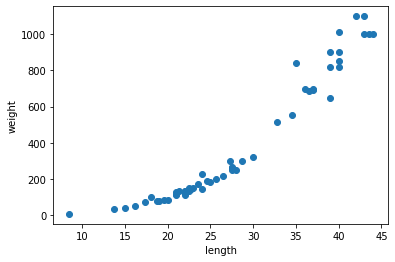

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( perch_length, perch_weight, random_state =42 )

sklearn에 사용할 train set은 2차원 array(shape:(n,m))이어야 하는데, perch_length는 1차원 배열(shape:(n,))이기에 train_input, test_input 역시 1차원 배열   
=> 이를 해결하기 위해 **reshape()** 메소드를 사용

In [ ]:
print(train_input.shape)
print(test_input.shape)
# 현재 둘 다 1차원

(42,)
(14,)


In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


reshape(n,m) 은 nxm짜리 1차원 배열을 row=n, col=m인 2차원 배열로 나누는 함수   
=> 이때 계산을 최소화하기 위해 **-1**을 사용하는데, N = n1xn2 일 때 reshape(-1,n2)을 사용하면 -1에 자동으로 n1(=N/n2)가 할당됨

### 결정계수(Rsq), 오차(MAE 등)
k-nearest neighbor Regression의 경우 score가 결정계수(R^2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.9928094061010639


test_input -> predict VS test_target : SCORE

In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


test_input에 대한 예측값(test__prediction)이 실제값(test__target)과 약 19g 정도 차이난다는 의미

### 과대적합과 과소적합

- 보통 train set의 score가 test set의 score보다 높음
- **만약 train set과 test set의 score가 과도하게 차이가 난다면** 이는 적절한 모델링이 아님!
- train set의 score >> test set의 score : **과대적합**
- train set의 socre < test set의 score 또는 score 자체가 너무 낮음 : **과소적합**


In [ ]:
print("TRAIN SCORE:{0}, TEST SCORE:{1}이므로 과소적합" .format( round(knr.score(train_input, train_target),ndigits=4) , round(knr.score(test_input, test_target),ndigits=4)) )

TRAIN SCORE:0.9699, TEST SCORE:0.9928이므로 과소적합


과소적합을 해결하기 위해 모델을 복잡하게 만들어야 함   
=> n_neighbors = 3 (이웃 수를 3개)로 설정

In [ ]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print("TRAIN :",knr.score(train_input, train_target))
print("TEST :", knr.score(test_input, test_target))

TRAIN : 0.9804899950518966
TEST : 0.974645996398761


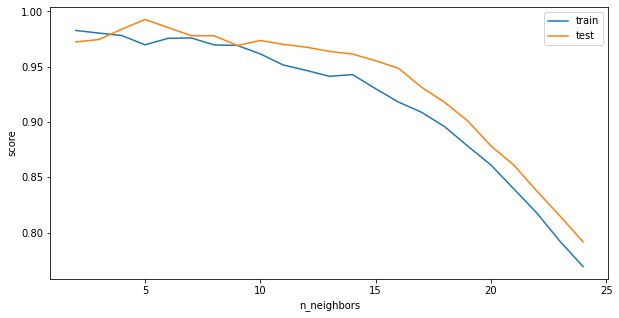

In [ ]:
# 이웃 수를 늘려가면 train set과 test set의 결정계수(score)가 어떻게 변하는지 그래프로 표현

train_score_arr =[]
test_score_arr =[]
knr_sub = KNeighborsRegressor()
for n in range(2,25):
  knr_sub.n_neighbors = n
  knr_sub.fit(train_input, train_target)
  train_score = knr_sub.score(train_input, train_target)
  test_score = knr_sub.score(test_input, test_target)
  train_score_arr.append(train_score)
  test_score_arr.append(test_score)

plt.figure(figsize=(10,5))
plt.plot(range(2,25), train_score_arr, label='train')
plt.plot(range(2,25), test_score_arr, label='test')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()


그래프를 보면 n<5 일 때만 높은 score를 가지면서 train < test이고 나머지는 과소적합

# 3-2. 선형 회귀
* 선형 회귀, 계수(가중치), Parameter, Polynomial

### k-nearest neighbors Regression의 한계

In [ ]:
import numpy as np
# np.array로 list -> 1차원 array
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련세트와 테스트세트로 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( perch_length, perch_weight, random_state=42 )
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 모델링
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
knr.predict([[50]])

array([1033.33333333])

fitted model을 이용하여 50cm perch의 무게를 예측한 결과 1033.33g이 나왔으나 실제는 이보다 더욱 큰 값   
=> 오차의 원인은?

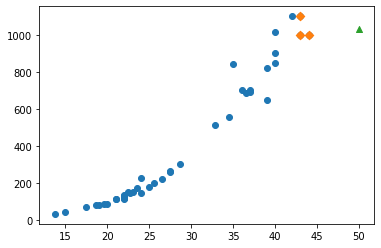

In [ ]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, knr.predict([[50]]), marker='^')

In [ ]:
np.mean(train_target[indexes])

1033.3333333333333

k-nearest neighbors는 새로운 샘플이 훈련 세트의 범위를 벗어나면 제대로 예측할 수 없음     
=> 기존 영역의 경계값을 도출할 뿐 적절한 예측이 어려움

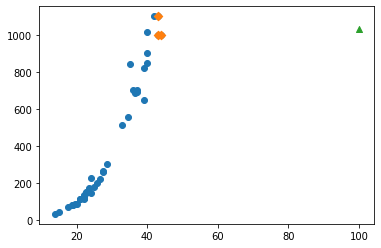

In [ ]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, knr.predict([[100]]), marker='^')

### 선형 회귀
: MSE가 최소가 되는 일차 회귀 방정식을 찾는 기법

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


- 선형 회귀로 예측한 결과 50cm perch는 1241.84g으로 이전의 k-nn으로 예측한 결과인 1033.33g보다 큰 값을 가짐
- 선형 회귀 추정 결과로서 parameter 값은 coef_, intercept_에 저장되어 있음

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


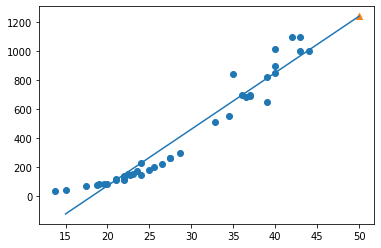

In [ ]:
plt.scatter(train_input, train_target)
# 15~50까지의 1차 방정식 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.show()

In [ ]:
print("TRAIN Score: ", lr.score(train_input, train_target))
print("TEST Score: ", lr.score(test_input, test_target))
print("전체적으로 점수가 낮아 과소적합으로 평가됨")

TRAIN Score:  0.9398463339976039
TEST Score:  0.8247503123313558
전체적으로 점수가 낮아 과소적합으로 평가됨


### 다항 회귀
- 위 선형 회귀 모델의 문제 : 과소적합, 18cm 정도 이하부터는 길이가 음수가 됨 

In [ ]:
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print("추정된 다항 회귀방정식 : Y^hat = ({0})* x^2 + ({1})* x + ({2}) ".format(lr.coef_[0], lr.coef_[1],  lr.intercept_))

[1573.98423528]
추정된 다항 회귀방정식 : Y^hat = (1.0143321093767301)* x^2 + (-21.557924978837352)* x + (116.05021078278276) 


방정식 그래프를 그리기 위해서는 x축의 point와 각 point의 방정식 함수값을 plot으로 연결하는 방법을 사용해야 함

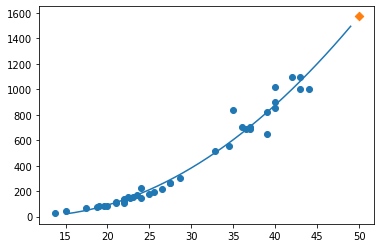

In [ ]:
# 2차 방정식 그래프
point = np.arange(15,50)
plt.plot(point,(1.0143321093767301)*(point**2) + (-21.557924978837352)*point + (116.05021078278276))

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 50cm perch data
plt.scatter(50, lr.predict([[50**2, 50]]), marker='D')

plt.xlabel='length'
plt.ylabel='weight'
plt.show()

In [ ]:
print("TRAIN Score: ", lr.score(train_poly, train_target))
print("TEST Score: ", lr.score(test_poly, test_target))

TRAIN Score:  0.9706807451768623
TEST Score:  0.9775935108325122


선형 회귀보다 score 값이 크게 개선, 다만 과소적합이 남아있어 더욱 복잡한 모델이 필요해 보임

# 3-3. 특성 공학과 규제
- 특성 공학, 규제, 릿지, 라쏘, 하이퍼파라미터
- pandas

### 다중 회귀(mutiple regression)와 특성 공학(feature engineering)

- 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현할 수 있음
- **특성 공학** : 특성의 제곱과 특성 간의 곱을 통해 새로운 특성들을 만들어내는 기법

### 데이터 준비
- pandas에서 받은 DataFrame을 **to_numpy()** 함수를 통해 array로 변환

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


In [ ]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기(transformer)

변환기(transformer) : 특성을 만들거나 전처리를 위한 class   
=> fit(), transfor()   
LinearRegression 같은 사이킷런 모델 클래스는 estimator

특성 공학 과정   
1. PolynomialFeatures()
1. fit([[]])
1. transform([[]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  # 특성 공학을 수행하는 함수
poly = PolynomialFeatures()
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

[2,3]이라는 2개의 특성이 6개의 특성으로 바뀜   
현재 주어진 특성은 (길이, 높이, 두께, 1)이며 이를 특성 공학을 이용하여 절편을 제외한 채(include_bias=False) 변환하면 다음과 같음

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


train_poply의 특성 수는 9개이며, get_feature_names()를 이용하면 9개 특성이 각각 어떤 입력의 조합인지 알려줌

In [ ]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

### 다중 회귀 모델의 훈련

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("TRAIN Score:",lr.score(train_poly, train_target))

poly.fit(test_input)
test_poly = poly.transform(test_input)
print("TEST Score:",lr.score(test_poly, test_target))

TRAIN Score: 0.9903183436982124
TEST Score: 0.9714559911594132


In [ ]:
# 5제곱 특성
poly = PolynomialFeatures(degree=5, include_bias=False)  # degree의 default는 3
poly.fit(train_input)
train_poly = poly.transform(train_input)
poly.fit(test_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


0.9999999999991096
-144.40579242335605


PolynomialFeatures의 degree 매개변수는 특성의 power를 결정

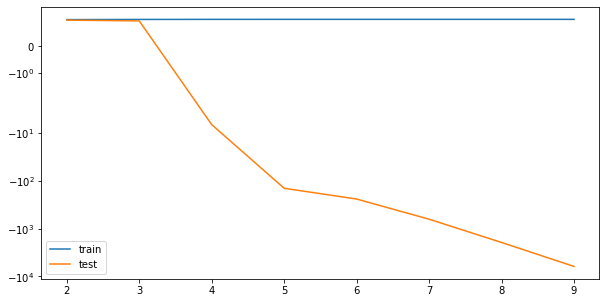

In [ ]:
train_score_arr =[]
test_score_arr =[]


lr = LinearRegression()

for n in range(2, 10) :
  poly = PolynomialFeatures(degree=n, include_bias=False)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  poly.fit(test_input)
  test_poly = poly.transform(test_input)

  lr.fit(train_poly, train_target)
  train_score = lr.score(train_poly, train_target)
  test_score = lr.score(test_poly, test_target)
  train_score_arr.append(train_score)
  test_score_arr.append(test_score)


plt.figure(figsize=(10,5))
plt.plot(range(2,10), train_score_arr, label='train')
plt.plot(range(2,10), test_score_arr, label='test')
plt.yscale('symlog')  # y 축 scale을 symmetric log로 변환
plt.legend()
plt.show()


degree가 3을 넘어가는 시점에서 엄청난 error를 보여주고 있음 (음의 Rsq)

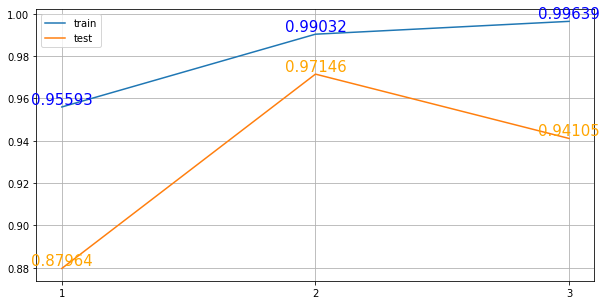

In [ ]:
# degree = 0, 1, 2 에 대한 결과

train_score_arr =[]
test_score_arr =[]


lr = LinearRegression()

for n in range(1, 4) :
  poly = PolynomialFeatures(degree=n, include_bias=False)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  poly.fit(test_input)
  test_poly = poly.transform(test_input)

  lr.fit(train_poly, train_target)
  train_score = lr.score(train_poly, train_target)
  test_score = lr.score(test_poly, test_target)
  train_score_arr.append(train_score)
  test_score_arr.append(test_score)


plt.figure(figsize=(10,5))
plt.plot(range(1,4), train_score_arr, label='train')
plt.plot(range(1,4), test_score_arr, label='test')
plt.grid(True)  # 그리드 표시
plt.xticks([1,2,3]) # x축에 나타나는 점을 1,2,3으로 한정
plt.legend()

# 데이터 값 표시
for i in range(0,3):
  plt.text(i+1, round(train_score_arr[i], ndigits=5), round(train_score_arr[i], ndigits=5), \
           fontsize = 15, color='blue', horizontalalignment='center', verticalalignment='bottom')
for i in range(0,3):
  plt.text(i+1, round(test_score_arr[i], ndigits=5), round(test_score_arr[i], ndigits=5), \
           fontsize = 15, color='orange', horizontalalignment='center', verticalalignment='bottom')

plt.show()

### 규제 : Ridge, Lasso
- 일반적으로 선형 회귀 모델에 규제를 적할 때 계수 값의 크기가 너무 차이나면 공정하게 제어되지 않음
- 전처리로서 정규화를 해줘야함 : **StandardScaler**
- 선형 회귀 모델에 규제를 추가한 모델이 Ridge, Lasso
- Ridge는 계수를 제곱한 값을 기준으로 규제
- Lasso는 계수의 절대값을 기준으로 규제, 계수값을 아예 0으로 만들 수 있음

In [ ]:
# 5제곱 특성
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
poly.fit(test_input)
test_poly = poly.transform(test_input)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### Rigde
- sklearn.linear_model에서 import
- alpha : 규제의 강도, alpha값이 클수록 규제가 강해져 계수값을 줄이고 보다 과소적합되도록(train socre 낮춤) 유도

In [ ]:
# degree of PF = 5

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


앞서 Ridge를 적용하지 않았을 때 0.9999999999991096
-144.40579242335605 가 나온 것에 비하면 매우 정확도가 높음

적절한 alpha 값을 찾기 위해서는 여러 alpha값에 대해 R^2를 찾아 비교해야함

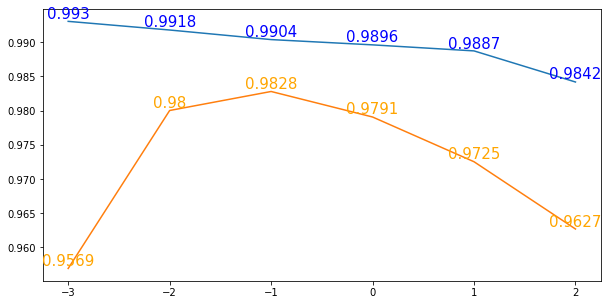

In [ ]:
# degree of PF = 5
train_score = []
test_score = []
alpha_list =[0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)  # np.log()는 자연로그함수, np.log10()은 10을 밑으로 하는 상용로그함수 
plt.plot(np.log10(alpha_list), test_score)
for i, txt in enumerate(train_score):
  plt.text( np.log10(alpha_list)[i] , round(train_score[i], ndigits=4), round(txt, ndigits=4), \
           fontsize = 15, color='blue', horizontalalignment='center', verticalalignment='bottom')
for i, txt in enumerate(test_score):
  plt.text( np.log10(alpha_list)[i] , round(test_score[i], ndigits=4), round(txt, ndigits=4), \
           fontsize = 15, color='orange', horizontalalignment='center', verticalalignment='bottom')

plt.show()

train score와 test score의 차이가 최소화되는 지점 : alpha = 0.1

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


정리하면, PolynomialFeatures(degree=5)일 때 Ridge(alpha=0.1)이면 train_score가 0.9904, test_score가 0.9828

#### Lasso
- alpha
- max iter_
- lasso.coef_


In [ ]:
# degree of PF = 5

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


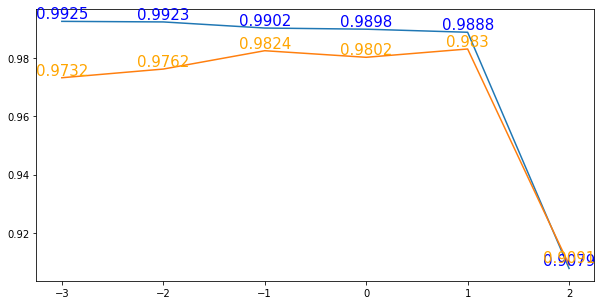

[0, 11, 42, 47, 48, 52]


In [ ]:
# degree of PF = 5
train_score = []
test_score = []
zero_coef =[]
alpha_list =[0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))
  zero_coef.append(np.sum(lasso.coef_ ==0))

plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)  # np.log()는 자연로그함수, np.log10()은 10을 밑으로 하는 상용로그함수 
plt.plot(np.log10(alpha_list), test_score)
for i, txt in enumerate(train_score):
  plt.text( np.log10(alpha_list)[i] , round(train_score[i], ndigits=4), round(txt, ndigits=4), \
           fontsize = 15, color='blue', horizontalalignment='center', verticalalignment='bottom')
for i, txt in enumerate(test_score):
  plt.text( np.log10(alpha_list)[i] , round(test_score[i], ndigits=4), round(txt, ndigits=4), \
           fontsize = 15, color='orange', horizontalalignment='center', verticalalignment='bottom')

plt.show()
print(zero_coef)

- np.sum() 함수는 배열을 모두 더한 값을 반환, np.sum() 함수는 True를 1로, False를 0으로 인식하여 덧셈을 할 수 있어 비교연산자에 맞는 원소 개수를 헤아리는 효과를 냄
- alpha가 10일 때 lasso 모델이 사용한 특성은 55-48 =7개 뿐임

### Ridge, Lasso Iteration

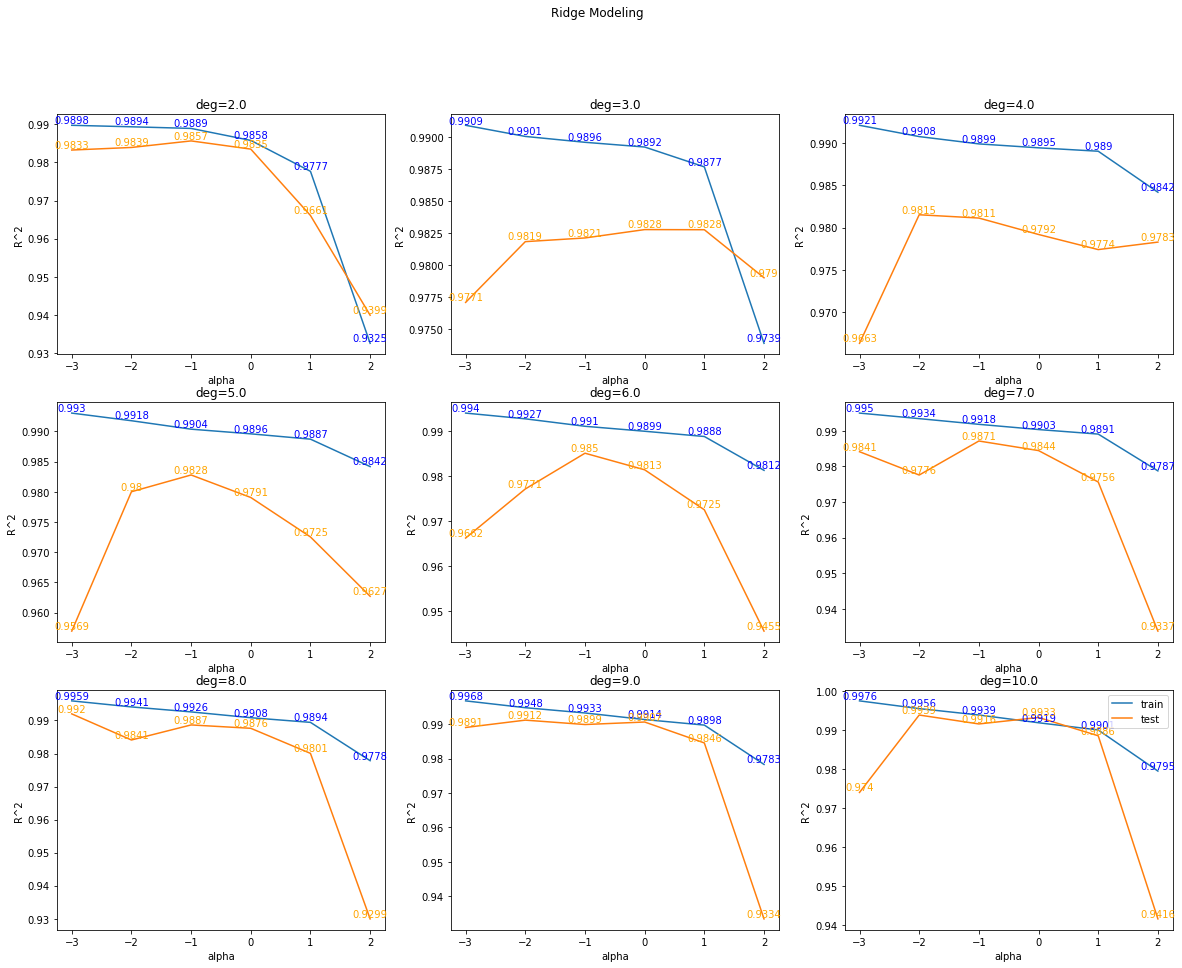

In [ ]:
train_score_r =[]
test_score_r =[]


for n in range(2, 11) :
  poly = PolynomialFeatures(degree=n, include_bias=False)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  poly.fit(test_input)
  test_poly = poly.transform(test_input)

  ss = StandardScaler()
  ss.fit(train_poly)
  train_scaled = ss.transform(train_poly)
  test_scaled = ss.transform(test_poly)

  alpha_list =[0.001, 0.01, 0.1, 1, 10, 100]
  for alpha in alpha_list :
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score_r.append(ridge.score(train_scaled, train_target))
    test_score_r.append(ridge.score(test_scaled, test_target))

# print(len(train_score_r))

fig, axs = plt.subplots(3,3, figsize=(20,15))
fig.suptitle('Ridge Modeling')
for i in range(0,3) :
  for j in range(0,3) :
    v = (i*3+j)*6
    axs[i,j].plot( np.log10(alpha_list), train_score_r[v:v+6], label='train')
    axs[i,j].plot( np.log10(alpha_list), test_score_r[v:v+6], label='test')
    axs[i,j].set_title("deg={}".format(v/6+2))
    axs[i,j].set(xlabel='alpha',ylabel='R^2')

    for k in range(0,6):
      axs[i,j].text( np.log10(alpha_list)[k] , round(train_score_r[v+k], ndigits=4), round(train_score_r[v+k], ndigits=4), color='blue', horizontalalignment='center', verticalalignment='bottom')
    for k in range(0, 6):
      axs[i,j].text( np.log10(alpha_list)[k] , round(test_score_r[v+k], ndigits=4), round(test_score_r[v+k], ndigits=4), \
               color='orange', horizontalalignment='center', verticalalignment='bottom')
    
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24660.43863638939, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8738.521394202828, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23200.991721356604, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9578.857479

[[  0   0   3   4   5   6]
 [  0   4  11  12  12  16]
 [  0   5  26  26  26  31]
 [  0  11  42  47  48  52]
 [  1  27  69  76  74  80]
 [  0  52 105 112 109 116]]


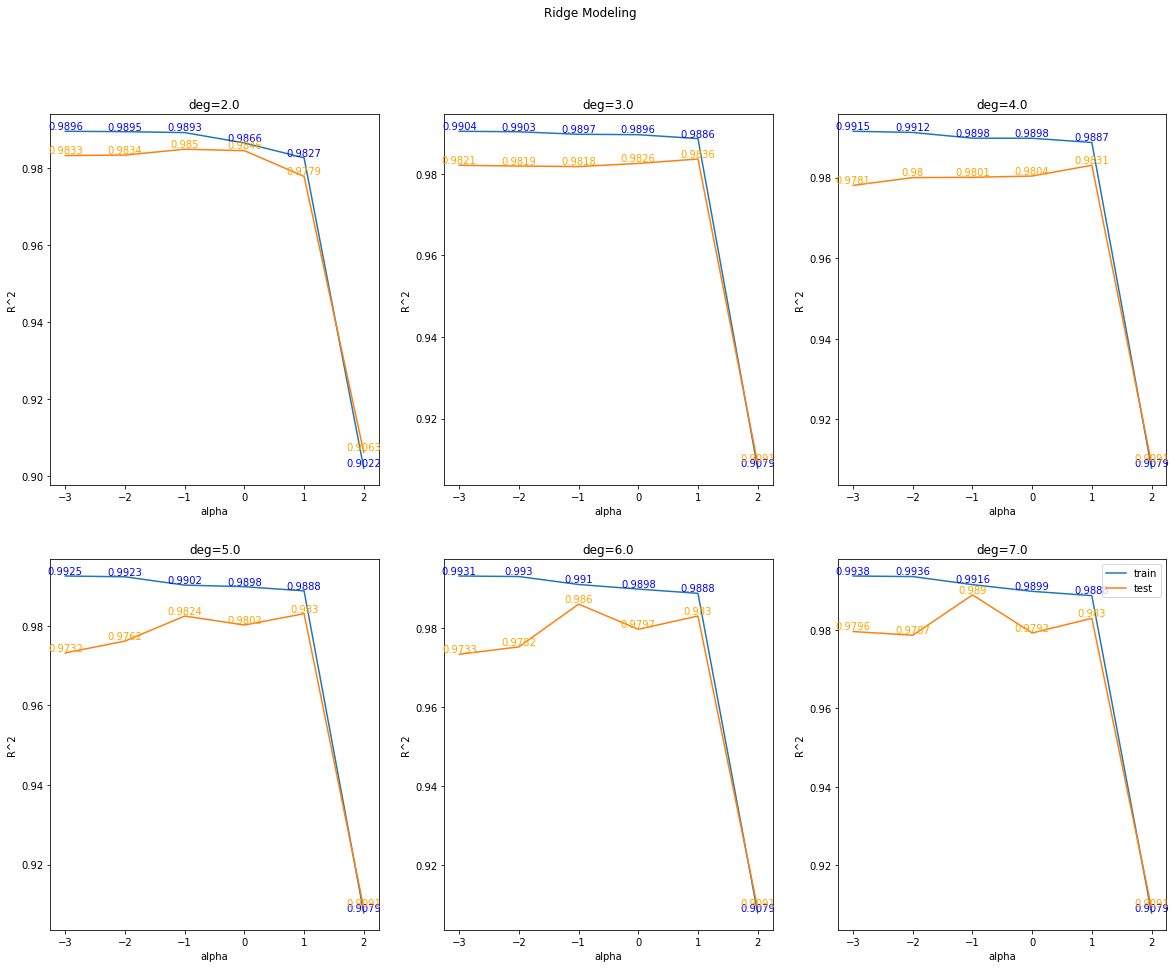

In [ ]:
train_score_r =[]
test_score_r =[]
zero_coef_r =[]
for n in range(2, 8) :
  poly = PolynomialFeatures(degree=n, include_bias=False)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  poly.fit(test_input)
  test_poly = poly.transform(test_input)

  ss = StandardScaler()
  ss.fit(train_poly)
  train_scaled = ss.transform(train_poly)
  test_scaled = ss.transform(test_poly)

  alpha_list =[0.001, 0.01, 0.1, 1, 10, 100]
  for alpha in alpha_list :
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score_r.append(lasso.score(train_scaled, train_target))
    test_score_r.append(lasso.score(test_scaled, test_target))
    zero_coef_r.append(np.sum(lasso.coef_ ==0))

print(np.array(zero_coef_r).reshape(-1,6))

fig, axs = plt.subplots(2,3, figsize=(20,15))
fig.suptitle('Ridge Modeling')
for i in range(0,2) :
  for j in range(0,3) :
    v = (i*3+j)*6
    axs[i,j].plot( np.log10(alpha_list), train_score_r[v:v+6], label='train')
    axs[i,j].plot( np.log10(alpha_list), test_score_r[v:v+6], label='test')
    axs[i,j].set_title("deg={}".format(v/6+2))
    axs[i,j].set(xlabel='alpha',ylabel='R^2')

    for k in range(0,6):
      axs[i,j].text( np.log10(alpha_list)[k] , round(train_score_r[v+k], ndigits=4), round(train_score_r[v+k], ndigits=4), color='blue', horizontalalignment='center', verticalalignment='bottom')
    for k in range(0, 6):
      axs[i,j].text( np.log10(alpha_list)[k] , round(test_score_r[v+k], ndigits=4), round(test_score_r[v+k], ndigits=4), \
               color='orange', horizontalalignment='center', verticalalignment='bottom')
    
plt.legend()
plt.show()

Degree가 5를 넘어가면 샘플보다 특성이 더 많아짐